In [1]:
import cmdstanpy
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy

In [22]:
path = os.getcwd()
print("Current path: ", path)

# Exercise 1
# Ad.1
df = pd.read_csv(r'Data1.csv')
print (df)

Current path:  /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab1_Python_review
      Unnamed: 0   theta_1   theta_2   theta_3   theta_4   theta_5    theta_6
0     2017-01-01  0.756936 -1.467790  0.096136 -0.115306 -0.447908   0.902579
1     2017-01-02  0.767089  0.185797 -1.428536 -0.086443 -0.954288   1.930909
2     2017-01-03  0.404544  1.415887  0.443466  0.000200 -0.892351   2.449691
3     2017-01-04  1.313957 -1.804471 -0.836986  0.011785 -1.012518   1.182085
4     2017-01-05  0.209862  1.315868  0.140993 -0.046473 -1.417092   1.742433
...          ...       ...       ...       ...       ...       ...        ...
1090  2019-12-27 -1.520171 -1.128868  1.108275  0.936817  0.948045  11.755980
1091  2019-12-28  0.338910 -3.178251  1.484579  1.051123  1.025288  11.397092
1092  2019-12-29  0.263781  0.045725 -0.112476  0.823782  0.914111  10.918941
1093  2019-12-30 -0.425098 -1.002701 -0.834294  0.850904  0.801977  11.140722
1094  2019-12-31  0.848302  3.510521 -0.280626  0.967050 

In [11]:
# Ad.1,2,3
df2 = pd.read_csv(r'Data1.csv', index_col=0, parse_dates=True)
df2

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...
2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


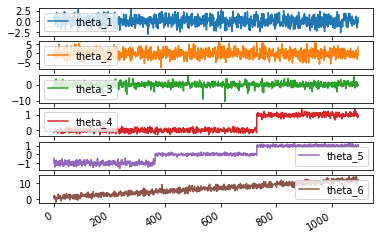

In [12]:
# Ad.4
df.plot(subplots=True)
plt.show()

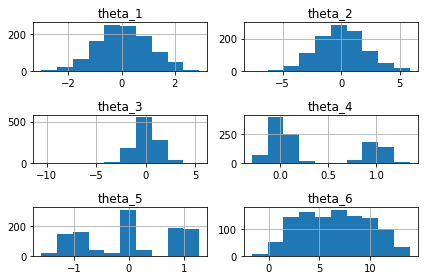

In [17]:
df.hist()
plt.tight_layout()
plt.show()

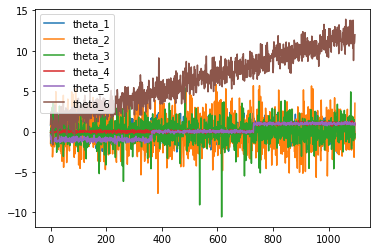

In [18]:
df.plot()
plt.show()

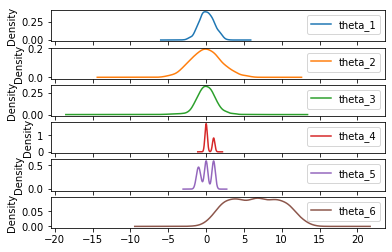

In [23]:
# Ad.5
df.plot.density(subplots=True)
plt.show()

In [55]:
# Ad.6
df_2018 = df2.loc['2018', 'theta_1':'theta_4']
df_2018.head()

,theta_1,theta_2,theta_3,theta_4
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530
2018-01-02,-0.283107,-0.979955,1.233933,0.158031
2018-01-03,1.572221,-2.033528,2.196317,0.041347
2018-01-04,-1.042981,0.651530,1.060125,0.064832
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025


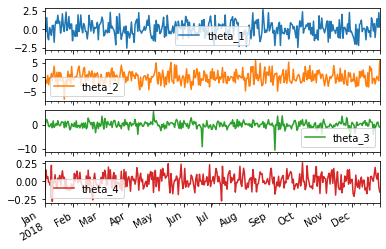

In [56]:
df_2018.plot(subplots=True)
plt.show()

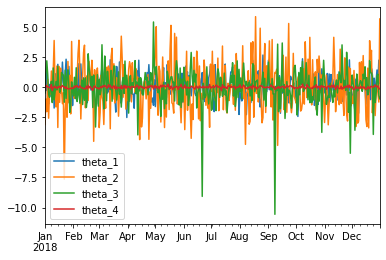

In [58]:
df_2018.plot()
plt.show()

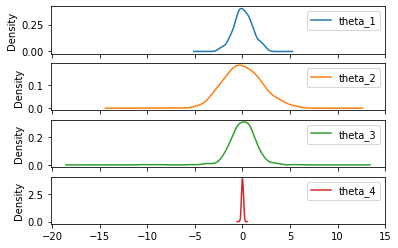

In [60]:
df_2018.plot.density(subplots=True)
plt.show()

In [2]:
# Exercise 2
from cmdstanpy import CmdStanModel

In [14]:
# Ad.3
# F = 5, L = 9
dict_samples = {
    "N": 14,
    "y": [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
}

In [15]:
# Ad.4
path = os.getcwd()
print("Current path: ", path)
# cmdstanpy.install_cmdstan() # Installation is necessary, conda env doesnt see cmdstanpy 

model = CmdStanModel(stan_file="bern_1.stan")

INFO:cmdstanpy:found newer exe file, not recompiling


Current path:  /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab1_Python_review


In [16]:
model

CmdStanModel: name=bern_1
	 stan_file=/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab1_Python_review/bern_1.stan
	 exe_file=/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab1_Python_review/bern_1
	 compiler_options=stanc_options={}, cpp_options={}

In [18]:
# Ad.5
model_fit = model.sample(data=dict_samples, output_dir='out')

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


In [25]:
# Ad.6
theta = model_fit.stan_variable('theta')

# Ad.7
df = model_fit.summary()
df_t = df.loc['theta']
t5 = df_t['5%']
t95 = df_t['95%']
median = df_t['50%']
df

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-12.0,0.0170,0.76,-13.00,-11.0,-11.0,1900.0,18000.0,1.0
theta,0.5,0.0033,0.12,0.29,0.5,0.7,1400.0,13000.0,1.0


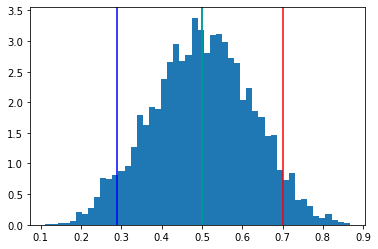

In [29]:
plt.hist(theta, bins=50, density=True)
plt.axvline(theta.mean(), color='k')
plt.axvline(t5, color='b')
plt.axvline(t95, color='r')
plt.axvline(median, color='c')
plt.show()